<a href="https://colab.research.google.com/github/nbkwon/ml-assignment/blob/master/ml_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 과제 2에서 가져온 함수

import numpy

# ax + b 형식의 식의 결과를 반환해주는 함수
def get_y_by_linear(a, b, x):
    return (a * x) + b

# 
def calc_energy_value(theta_pair, data_dic):
    ret = 0

    m = len(data_dic)

    for x, y_in_data in data_dic.items():
        # hθ(x) =θ0 + θ1 * x
        calc_y = get_y_by_linear(theta_pair[1], theta_pair[0], x)
        calc_result = calc_y - y_in_data

        # 제곱을 처리
        ret = ret + (calc_result * calc_result)

    return ret / (m * 2)
    
# Gradient Descent를 위해 cost function을 변형한 식
def calc_cost_sum_for_gradient_descent(theta_pair, data_dic, will_multiply_x):
    ret = 0

    m = len(data_dic)

    for x, y_in_data in data_dic.items():
        # hθ(x) =θ0 + θ1 * x
        calc_y = get_y_by_linear(theta_pair[1], theta_pair[0], x)
        calc_result = calc_y - y_in_data
        if will_multiply_x:
            calc_result = calc_result * x

        ret = ret + calc_result

    return ret / m
    
def next_gradient_descent_step(step_size, theta_pair, data_dic):
    next_theta_0 = theta_pair[0] - step_size * calc_cost_sum_for_gradient_descent(theta_pair, data_dic, False)
    next_theta_1 = theta_pair[1] - step_size * calc_cost_sum_for_gradient_descent(theta_pair, data_dic, True)

    return next_theta_0, next_theta_1
    
def check_convergence(theta_pair, new_theta_pair):
    # float 형의 자료형 동일한지 판단을 위해 numpy의 isclose를 사용.
    atol = 0.0001
    return numpy.isclose(theta_pair[0], new_theta_pair[0], atol=atol) and numpy.isclose(theta_pair[1], new_theta_pair[1], atol=atol)

In [0]:
# we now need pyplot for plotting data
import matplotlib.pyplot as pyplot
def show_plot(download_file = False):
    pyplot.show()
    if download_file == False:
       return
    
    import google.colab
    file_name = "test.png"
    pyplot.savefig(file_name)
    google.colab.files.download(file_name)

def make_plot(plot_data_list):
    # it's too samll. make bigger.
    pyplot.figure(figsize=(50, 25))

    for data_dic, plot_type, color in plot_data_list:
        if plot_type is "plot":
            pyplot.plot(list(data_dic.keys()), list(data_dic.values()), c=color)
        if plot_type is "scatter":
            pyplot.scatter(list(data_dic.keys()), list(data_dic.values()), c=color)

In [0]:
import numpy as np
# import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]


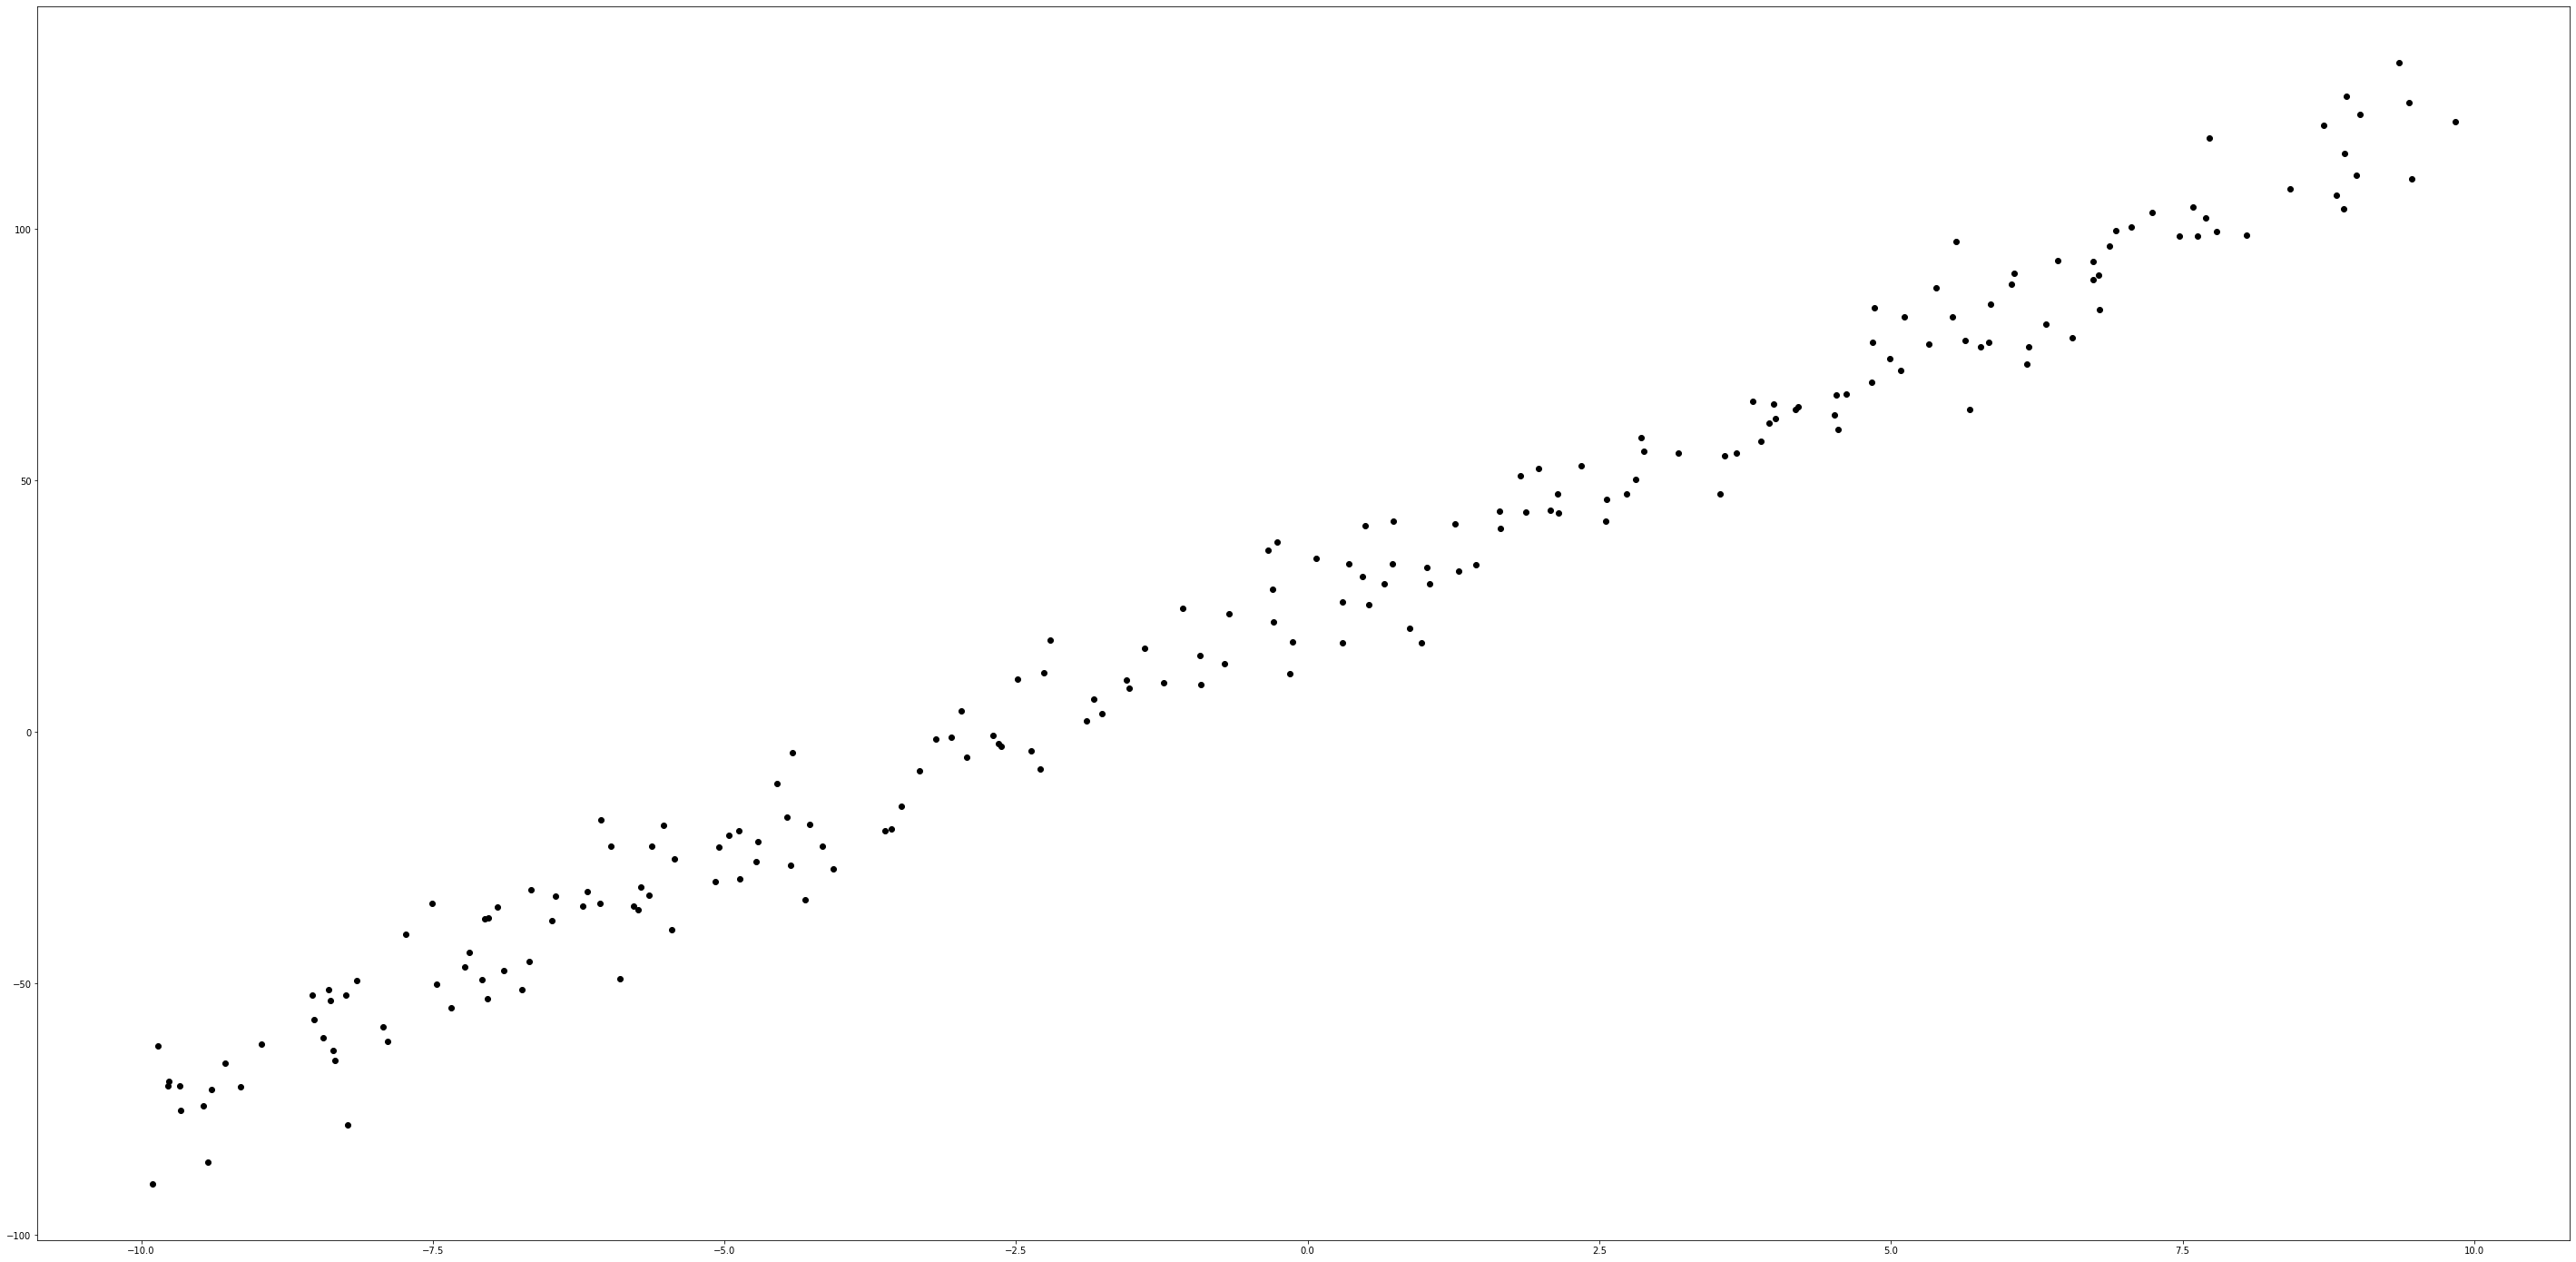

In [175]:
x_to_y_dic = dict(zip(x_data,y_data)) 
make_plot([(x_to_y_dic, "scatter", "black")])
show_plot()

In [176]:
# 과제 2에서 x_to_y_with_n은 과제 3에서의 주어진 데이터이다.
x_to_y_with_n = x_to_y_dic

current_theta_pair = (-30, -30)

step_size = 0.0001

step_count = 0

step_count_to_energy_value = {step_count: calc_energy_value(current_theta_pair, x_to_y_with_n)}
step_count_to_theta_0 = {step_count: current_theta_pair[0]}
step_count_to_theta_1 = {step_count: current_theta_pair[1]}

while(True):
    step_count = step_count + 1
    next_theta_pair = next_gradient_descent_step(step_size, current_theta_pair, x_to_y_with_n)
    
    step_count_to_energy_value[step_count] = calc_energy_value(next_theta_pair, x_to_y_with_n)
    step_count_to_theta_0[step_count] = next_theta_pair[0]
    step_count_to_theta_1[step_count] = next_theta_pair[1]
    
    if check_convergence(current_theta_pair, next_theta_pair):
        break 

    current_theta_pair = next_theta_pair

    
# make point pairs to be plotted.
solution_by_linear_regression_plot = {}
for x in x_to_y_with_n.keys():
    y_hat = get_y_by_linear(current_theta_pair[1], current_theta_pair[0], x)

    solution_by_linear_regression_plot[x] = y_hat

# show calculated theta
print("current_theta_pair", current_theta_pair)

current_theta_pair (21.712372608686795, 9.885437015475754)


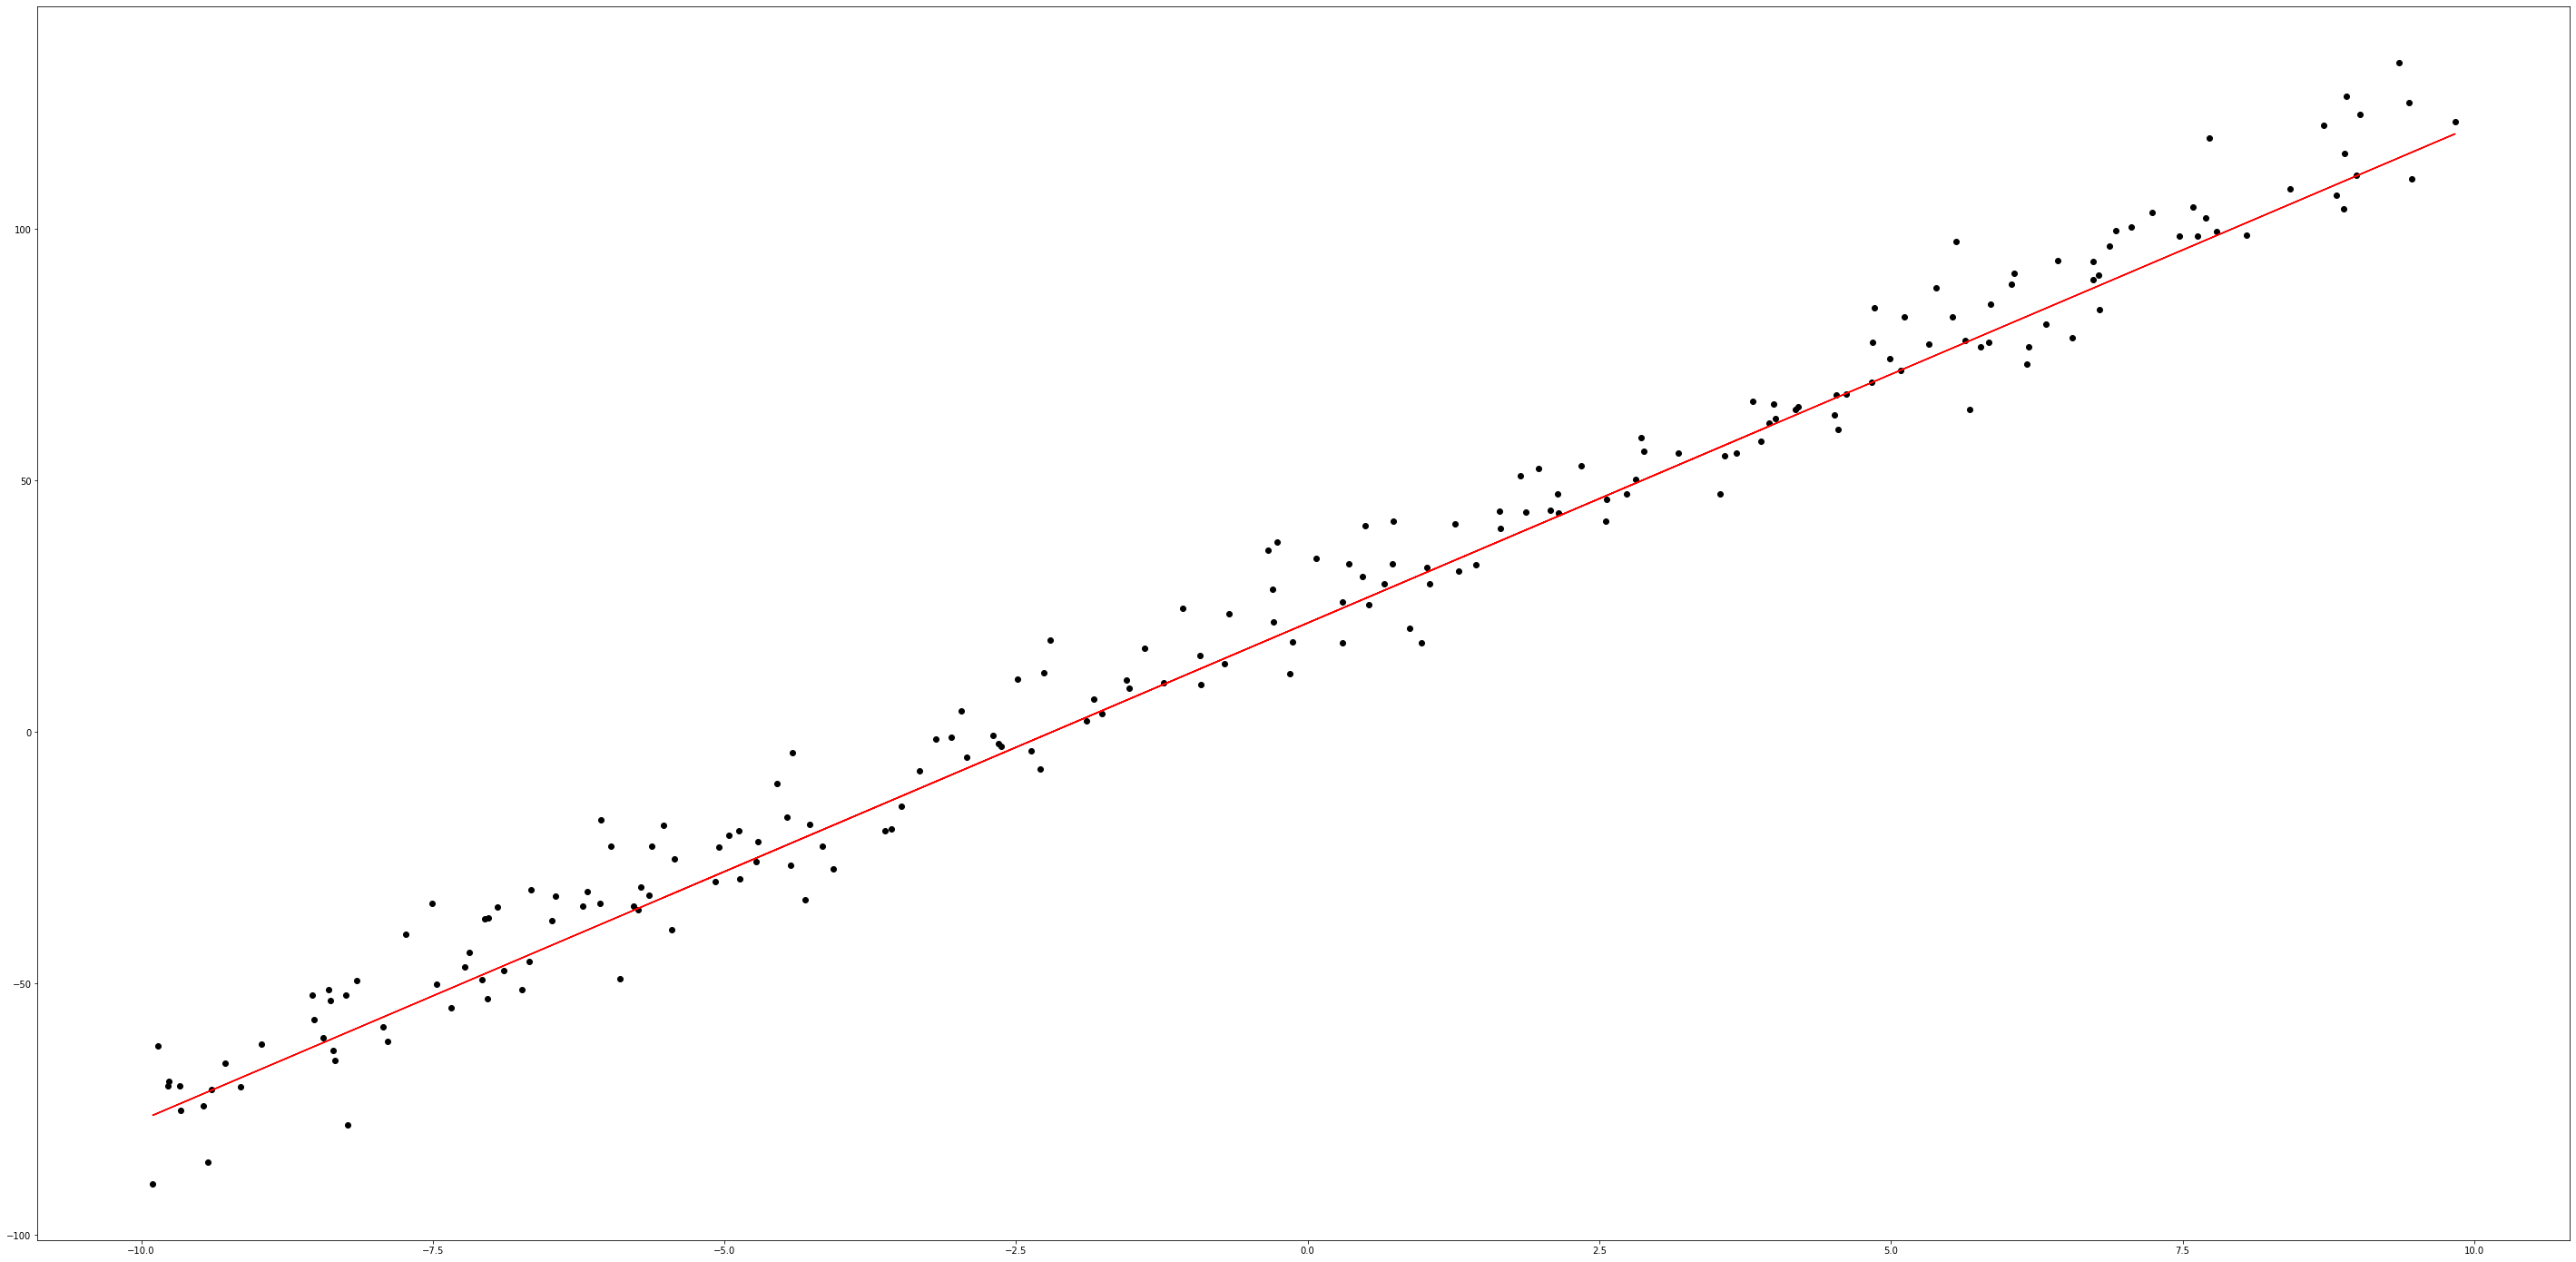

In [177]:
make_plot([(x_to_y_dic, "scatter", "black"), (solution_by_linear_regression_plot, "plot", "red")])
show_plot()

In [0]:
# 3D 표현을 위해 필요
from mpl_toolkits import mplot3d

x = np.arange(-30, 30, 0.1)
xx, yy = np.meshgrid(x, x)

def_calc_cost = np.frompyfunc(lambda x, y: calc_energy_value((x,y), x_to_y_with_n), 2, 1)
result = def_calc_cost.reduce((xx, yy), axis=0).astype(np.float64)


True


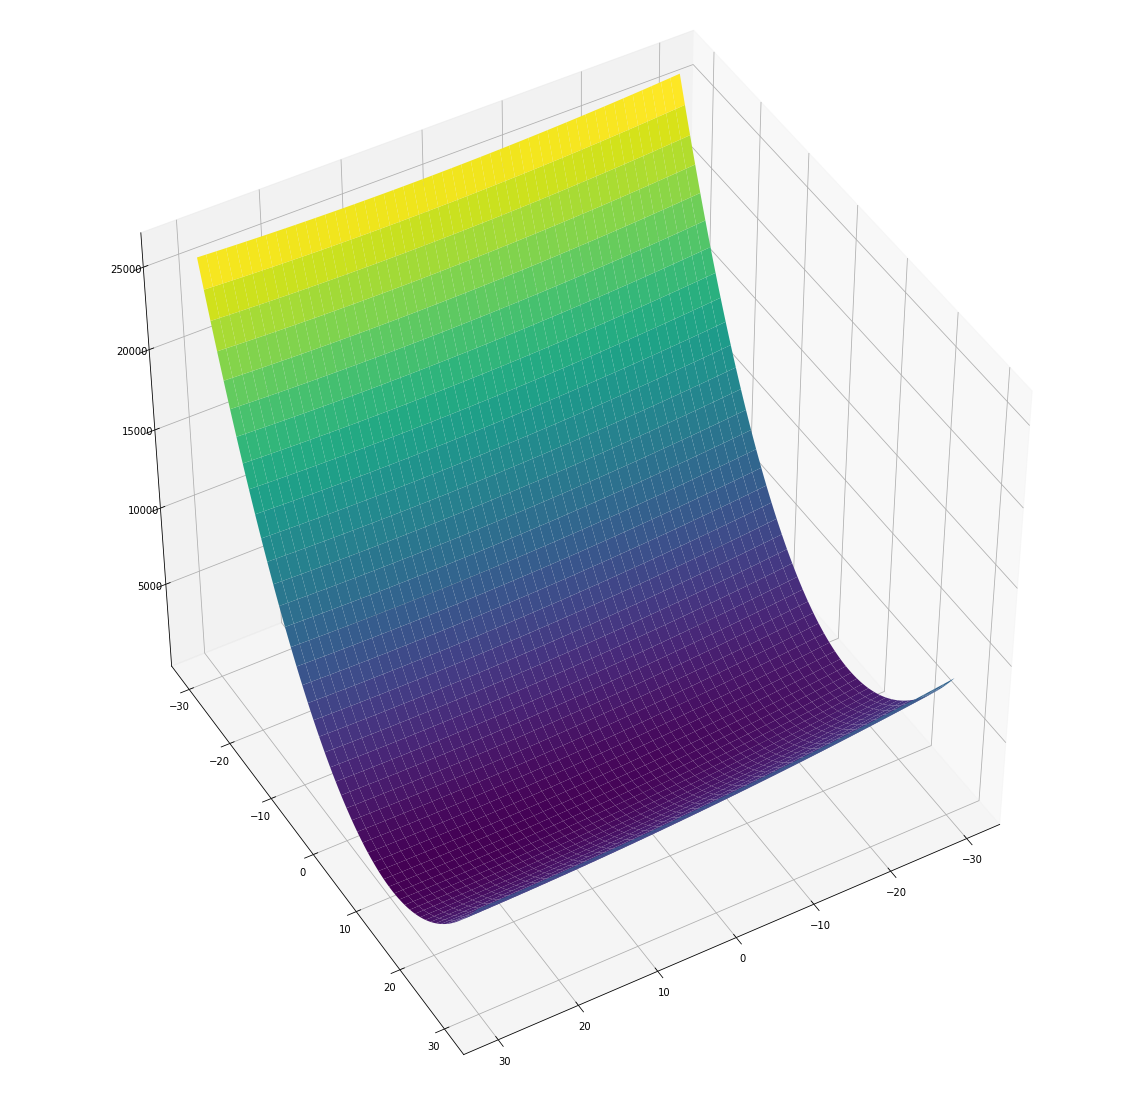

In [179]:
fig = pyplot.figure()
ax = pyplot.axes(projection='3d')
ax.view_init(45, 60)
ax.figure.set_size_inches(20, 20)


theta_0s = list(step_count_to_theta_0.values())
theta_1s = list(step_count_to_theta_1.values())
energy_values = list(step_count_to_energy_value.values())
# energy_values = list(map(lambda x : x+10000, energy_values))

# 검산
new_e_v = []
for x, y in zip(theta_0s, theta_1s):
    new_e_v.append(calc_energy_value((x,y), x_to_y_with_n))

print(new_e_v == energy_values)

ax.plot_surface(xx, yy, result, cmap='viridis', zorder=0)
pyplot.show()
# ax.plot(theta_0s, theta_1s, energy_values, c="red") 
ax.plot(theta_0s, theta_1s, energy_values, c="red", linewidth=2, zorder=3)
# ax.scatter3D(theta_0s, theta_1s, l, zdir='z', s=1000)


pyplot.show()

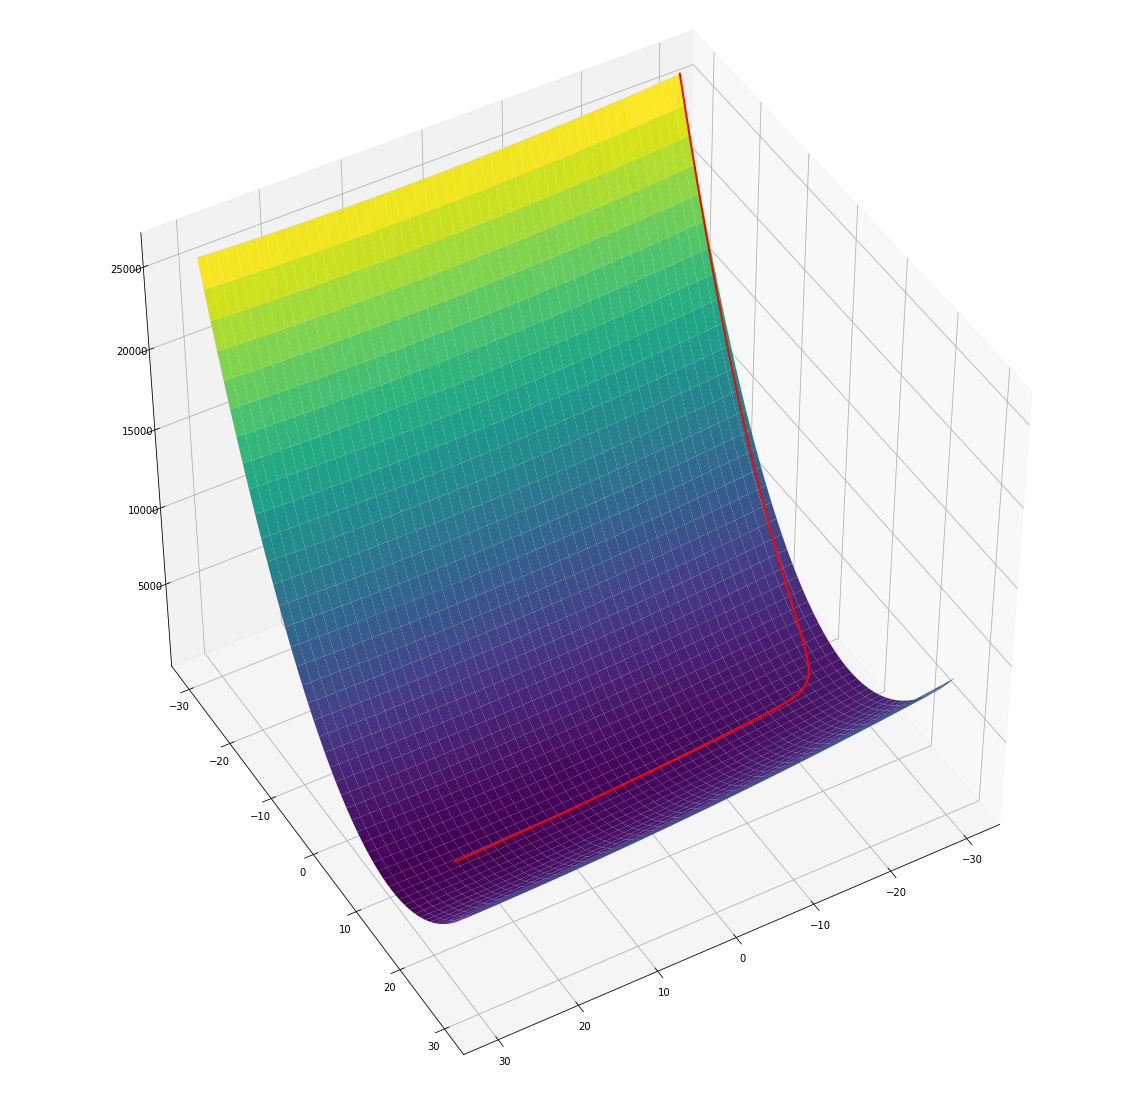

In [180]:
fig = pyplot.figure()
ax = pyplot.axes(projection='3d')
ax.view_init(45, 60)
ax.figure.set_size_inches(20, 20)

ax.plot_surface(xx, yy, result, cmap='viridis', zorder=0)
ax.plot(theta_0s, theta_1s, energy_values, c="red", linewidth=2, zorder=3)

pyplot.show()